# Multiple Linear Regression

## Bike Sharing Assignement

### Problem Statement
#### A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. 

#### The company want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands

### Business Goal:
#### To model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features



# Step 1: Reading and Understanding the Data

In [1579]:
# Supress warnings

import warnings
warnings.filterwarnings('ignore')

In [1580]:
import numpy as np, pandas as pd

In [1581]:
day=pd.read_csv("day.CSV")
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [1582]:
day.shape

(730, 16)

In [1583]:
# Converting 'weathersit' and 'season' column values 1,2,3,4 into string categorical values

day['season'] = day['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
day['weathersit'] = day['weathersit'].map({1:'Clear', 2:'Mist & Cloudy', 3:'Light Snow', 4:'Heavy Rain'})

In [1584]:
# Converting 'yr' column values 0 and 1 into string  values 2018 and 2019 respectively

day['yr'] = day['yr'].map({0:'2018', 1:'2019'})

In [1585]:
# Converting 'mnth' column values 1 to 12 inot Jan to Dec respectively

day['mnth'] = day['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})


In [1586]:
# Converting 'weekday' column values 0 and 6 into string  values Monday to Sunday

day['weekday'] = day['weekday'].map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})

In [1587]:
# Since we have extracted all the important values from 'dteday' column, hence this column in no more required

day=day.drop('dteday', axis=1)

In [1588]:
# dropping 'instant' clumn since it is just an index and it has no significant influence on the demand

day = day.drop(['instant'], axis=1)

In [1589]:
# dropping other variables which doesnt have no significant influence on the demand

day = day.drop(['casual', 'registered'], axis=1)

In [1590]:
# dropping atemp variable since it is redundant with temp

day = day.drop(['atemp'], axis=1)

In [1591]:
day

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sunday,0,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Monday,0,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Tuesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Wednesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Thursday,1,Clear,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,Dec,0,Friday,1,Mist & Cloudy,10.420847,65.2917,23.458911,2114
726,spring,2019,Dec,0,Saturday,1,Mist & Cloudy,10.386653,59.0000,10.416557,3095
727,spring,2019,Dec,0,Sunday,0,Mist & Cloudy,10.386653,75.2917,8.333661,1341
728,spring,2019,Dec,0,Monday,0,Clear,10.489153,48.3333,23.500518,1796


#### =========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
=========================================


In [1592]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 62.9+ KB


In [1593]:
day.describe()

,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


# Step 2: Visualising the Data

In [1594]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Let's make a pairplot of all the numeric variables

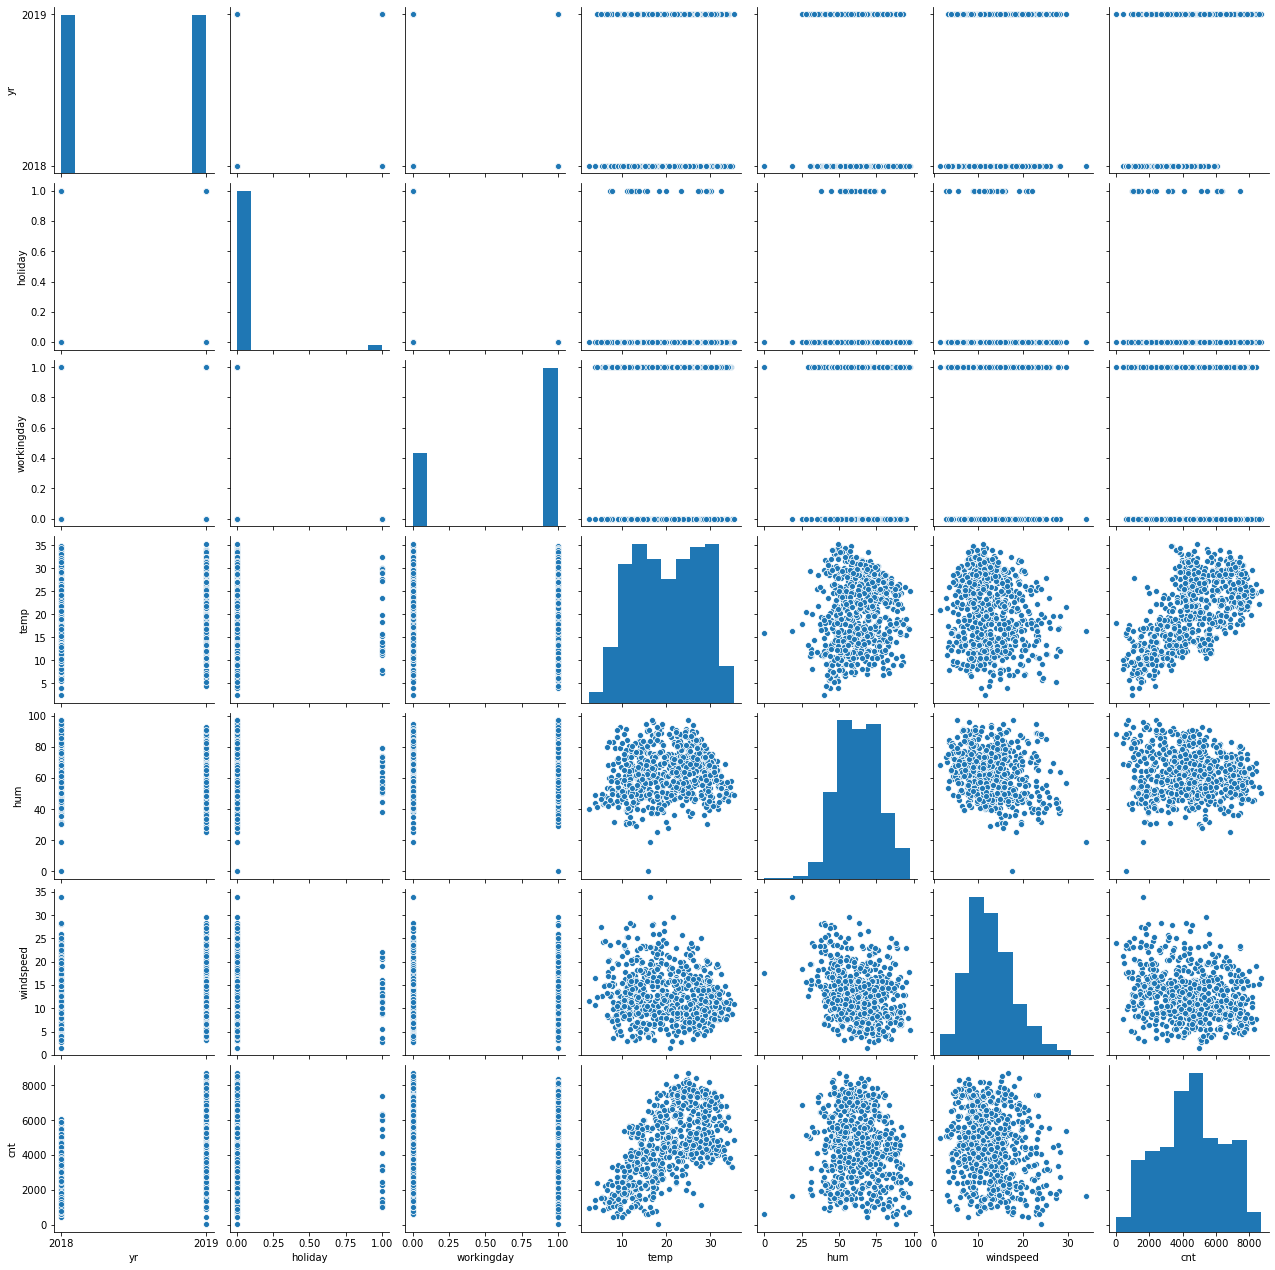

In [1595]:
sns.pairplot(day)
plt.show()

<Figure size 1440x720 with 0 Axes>

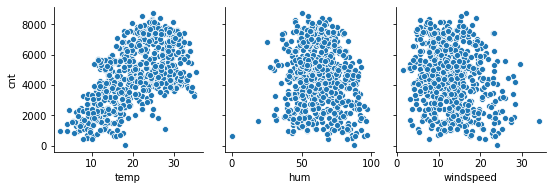

In [1596]:
plt.figure(figsize=(20,10))
sns.pairplot(x_vars=['temp', 'hum', 'windspeed'], y_vars=['cnt'], data=day)
plt.show()

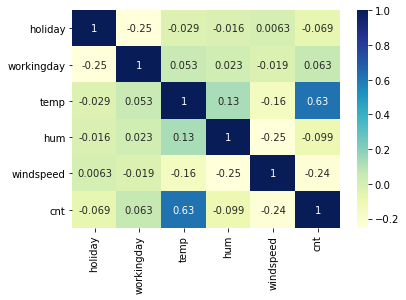

In [1597]:
sns.heatmap(day.corr(), cmap="YlGnBu", annot = True)
plt.show()

#### Visualising Categorical Variables

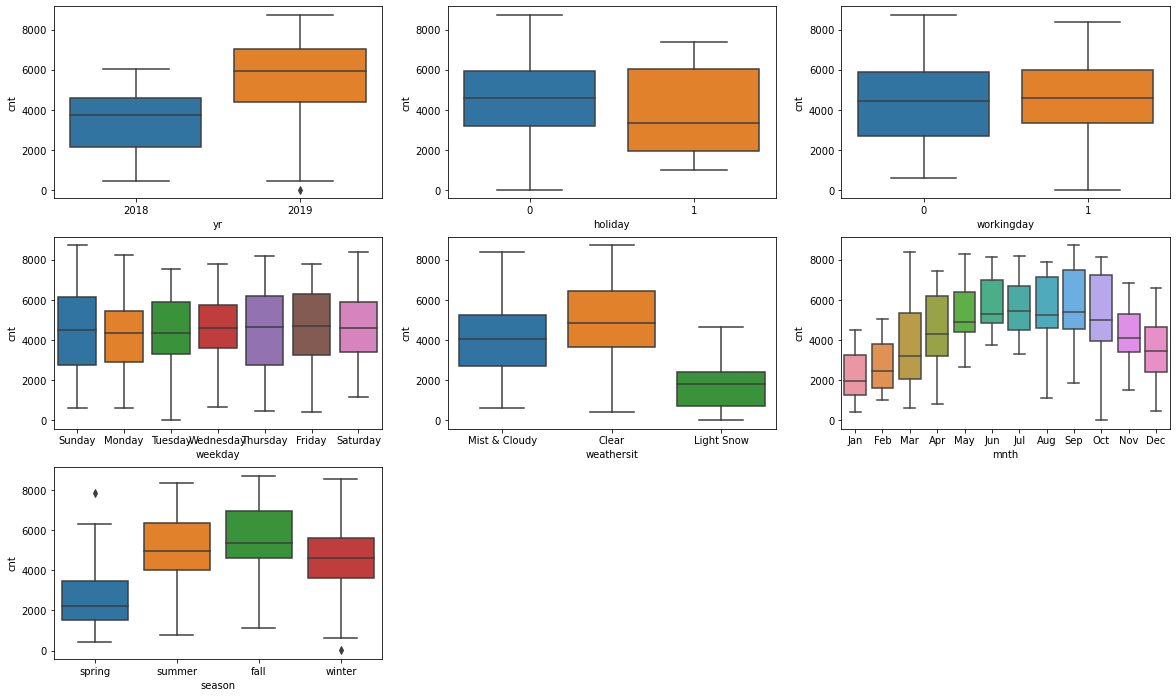

In [1598]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.subplot(3,3,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(3,3,7)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.show()

# Step 3: Data Preparation


## Dummy Variables
### Some features/categorical columns in our dataframe  have different levels. We need to convert these levels into integer 
### For this, we will use something called dummy variables.

## dummy variables for the feature 'season'

In [1599]:
# Get the dummy variables for the feature 'season' and store it in a new dataframe - 'season_status'
season_status = pd.get_dummies(day['season'])

In [1600]:
# Check what the dataset 'season_status' looks like
season_status

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
725,0,1,0,0
726,0,1,0,0
727,0,1,0,0
728,0,1,0,0


### Now, we don't need 4 columns. You can drop the season column, as the type of season can be identified with just the last two columns where — 
    - 000 will correspond to fall
    - 001 will correspond to winter
    - 010 will correspond to summer
    - 100 will correspond to spring

In [1601]:
# Let's drop the first column from 'season_status' df using 'drop_first = True'

season_status = pd.get_dummies(day['season'], drop_first = True)

In [1602]:
# Add the results to the original 'day' dataframe

day = pd.concat([day, season_status], axis = 1)

In [1603]:
day

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,2018,Jan,0,Sunday,0,Mist & Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,spring,2018,Jan,0,Monday,0,Mist & Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,spring,2018,Jan,0,Tuesday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,2018,Jan,0,Wednesday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,2018,Jan,0,Thursday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,Dec,0,Friday,1,Mist & Cloudy,10.420847,65.2917,23.458911,2114,1,0,0
726,spring,2019,Dec,0,Saturday,1,Mist & Cloudy,10.386653,59.0000,10.416557,3095,1,0,0
727,spring,2019,Dec,0,Sunday,0,Mist & Cloudy,10.386653,75.2917,8.333661,1341,1,0,0
728,spring,2019,Dec,0,Monday,0,Clear,10.489153,48.3333,23.500518,1796,1,0,0


In [1604]:
# Drop 'season' column as we have created the dummies for it

day.drop(['season'], axis = 1, inplace = True)

In [1605]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    object 
 1   mnth        730 non-null    object 
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    object 
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    object 
 6   temp        730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  spring      730 non-null    uint8  
 11  summer      730 non-null    uint8  
 12  winter      730 non-null    uint8  
dtypes: float64(3), int64(3), object(4), uint8(3)
memory usage: 59.3+ KB


## dummy variables for the 'yr'

In [1606]:
# Similarly get the dummy variables for the 'yr' categorical column and store it in a new dataframe - 'yr_status'
yr_status = pd.get_dummies(day['yr'])

In [1607]:
# Check what the dataset 'yr_status' looks like
yr_status

,2018,2019
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,1


In [1608]:
# Let's drop the first column from 'yr_status' df using 'drop_first = True'

yr_status = pd.get_dummies(day['yr'], drop_first = True)

In [1609]:
# Add the results to the original 'day' dataframe

day = pd.concat([day, yr_status], axis = 1)

In [1610]:
day

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,2019
0,2018,Jan,0,Sunday,0,Mist & Cloudy,14.110847,80.5833,10.749882,985,1,0,0,0
1,2018,Jan,0,Monday,0,Mist & Cloudy,14.902598,69.6087,16.652113,801,1,0,0,0
2,2018,Jan,0,Tuesday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0
3,2018,Jan,0,Wednesday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0
4,2018,Jan,0,Thursday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019,Dec,0,Friday,1,Mist & Cloudy,10.420847,65.2917,23.458911,2114,1,0,0,1
726,2019,Dec,0,Saturday,1,Mist & Cloudy,10.386653,59.0000,10.416557,3095,1,0,0,1
727,2019,Dec,0,Sunday,0,Mist & Cloudy,10.386653,75.2917,8.333661,1341,1,0,0,1
728,2019,Dec,0,Monday,0,Clear,10.489153,48.3333,23.500518,1796,1,0,0,1


In [1611]:
# Drop 'yr' column as we have created the dummies for it

day.drop('yr', axis = 1, inplace = True)

In [1612]:
day

,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,2019
0,Jan,0,Sunday,0,Mist & Cloudy,14.110847,80.5833,10.749882,985,1,0,0,0
1,Jan,0,Monday,0,Mist & Cloudy,14.902598,69.6087,16.652113,801,1,0,0,0
2,Jan,0,Tuesday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0
3,Jan,0,Wednesday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0
4,Jan,0,Thursday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,Dec,0,Friday,1,Mist & Cloudy,10.420847,65.2917,23.458911,2114,1,0,0,1
726,Dec,0,Saturday,1,Mist & Cloudy,10.386653,59.0000,10.416557,3095,1,0,0,1
727,Dec,0,Sunday,0,Mist & Cloudy,10.386653,75.2917,8.333661,1341,1,0,0,1
728,Dec,0,Monday,0,Clear,10.489153,48.3333,23.500518,1796,1,0,0,1


## dummy variables for the 'mnth'

In [1613]:
# Similarly get the dummy variables for the 'mnth' categorical column and store it in a new dataframe - 'mnth_status'
mnth_status = pd.get_dummies(day['mnth'])

# Let's drop the first column from 'mnth_status' df using 'drop_first = True'

mnth_status = pd.get_dummies(day['mnth'], drop_first = True)

# Add the results to the original 'day' dataframe

day = pd.concat([day, mnth_status], axis = 1)

# Drop 'mnth' column as we have created the dummies for it

day.drop(['mnth'], axis = 1, inplace = True)


In [1614]:
day

,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,Sunday,0,Mist & Cloudy,14.110847,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,Monday,0,Mist & Cloudy,14.902598,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,Tuesday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,Wednesday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,Thursday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,Friday,1,Mist & Cloudy,10.420847,65.2917,23.458911,2114,1,0,...,1,0,0,0,0,0,0,0,0,0
726,0,Saturday,1,Mist & Cloudy,10.386653,59.0000,10.416557,3095,1,0,...,1,0,0,0,0,0,0,0,0,0
727,0,Sunday,0,Mist & Cloudy,10.386653,75.2917,8.333661,1341,1,0,...,1,0,0,0,0,0,0,0,0,0
728,0,Monday,0,Clear,10.489153,48.3333,23.500518,1796,1,0,...,1,0,0,0,0,0,0,0,0,0


## dummy variables for the 'weekday'

In [1615]:
# Similarly get the dummy variables for the 'weekday' categorical column and store it in a new dataframe - 'weekday_status'
weekday_status = pd.get_dummies(day['weekday'])

# Let's drop the first column from 'weekday_status' df using 'drop_first = True'

weekday_status = pd.get_dummies(day['weekday'], drop_first = True)

# Add the results to the original 'day' dataframe

day = pd.concat([day, weekday_status], axis = 1)

# Drop 'weekday' column as we have created the dummies for it

day.drop(['weekday'], axis = 1, inplace = True)


In [1616]:
day

,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,Mist & Cloudy,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,Mist & Cloudy,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,Mist & Cloudy,10.420847,65.2917,23.458911,2114,1,0,0,...,0,0,0,0,0,0,0,0,0,0
726,0,1,Mist & Cloudy,10.386653,59.0000,10.416557,3095,1,0,0,...,0,0,0,0,0,1,0,0,0,0
727,0,0,Mist & Cloudy,10.386653,75.2917,8.333661,1341,1,0,0,...,0,0,0,0,0,0,1,0,0,0
728,0,0,Clear,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## dummy variables for the 'weathersit'

In [1617]:
# Similarly get the dummy variables for the 'weathersit' categorical column and store it in a new dataframe - 'weathersit_status'
weathersit_status = pd.get_dummies(day['weathersit'])

# Let's drop the first column from 'weathersit_status' df using 'drop_first = True'

weathersit_status = pd.get_dummies(day['weathersit'], drop_first = True)

# Add the results to the original 'day' dataframe

day = pd.concat([day, weathersit_status], axis = 1)

# Drop 'weathersit' column as we have created the dummies for it

day.drop(['weathersit'], axis = 1, inplace = True)


In [1620]:
day

,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,10.420847,65.2917,23.458911,2114,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
726,0,1,10.386653,59.0000,10.416557,3095,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
727,0,0,10.386653,75.2917,8.333661,1341,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
728,0,0,10.489153,48.3333,23.500518,1796,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


# Step 4: Splitting the Data into Training and Testing Sets


In [1671]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(day, train_size = 0.7, random_state = 100)

### Rescaling the Features
    - Min-Max scaling 
    - Standardisation (mean-0, sigma-1) 
using MinMax scaling


In [1672]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [1673]:
# Apply scaler() to all the columns except the 'categorical' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [1674]:
df_train.describe()

,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.507843,...,0.084314,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.029412,0.345098
std,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.500429,...,0.278131,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1675]:
df_train.describe()

,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.507843,...,0.084314,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.029412,0.345098
std,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.500429,...,0.278131,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


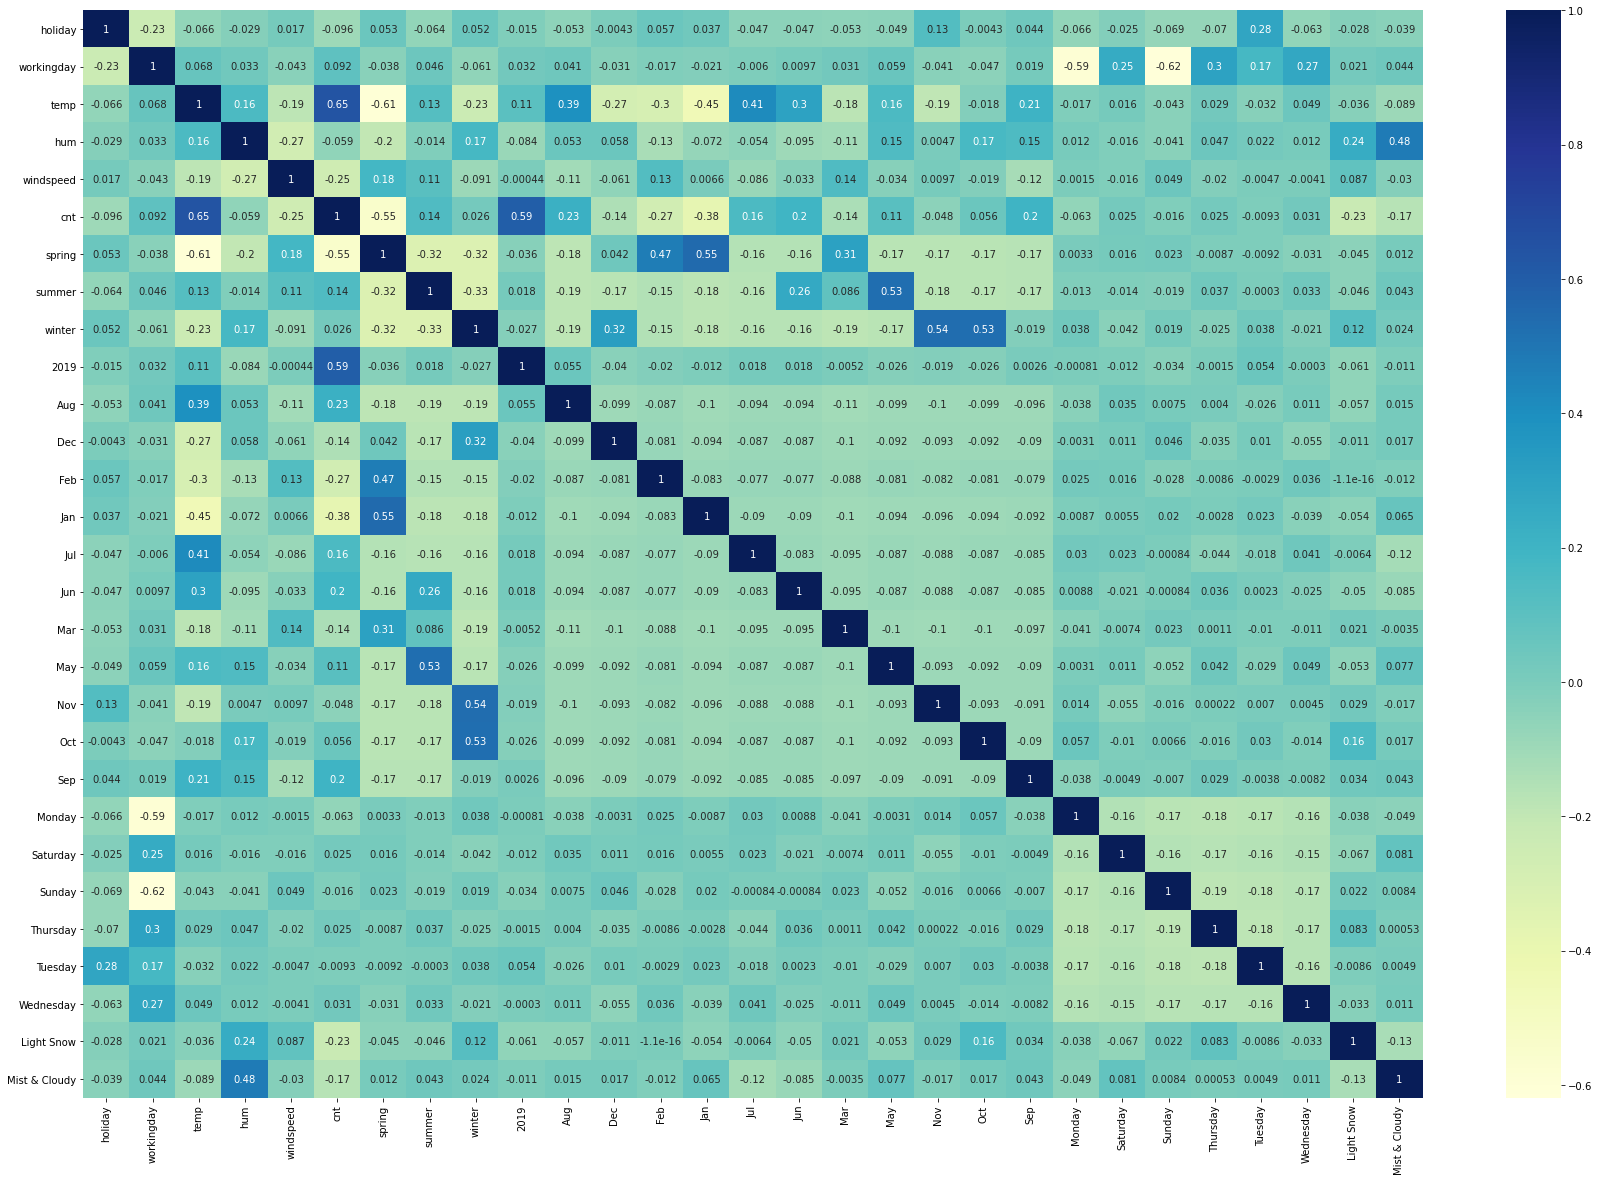

In [1676]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Dividing data into X and Y sets for the model building

In [1677]:
y_train=df_train.pop('cnt')
X_train=df_train

# Step5: Data Modelling and Evaluation

## Model Selection using RFE 


## Create Linear Regression Model using mixed approach RFE and VIF/P value
## RFE
    - Recursive feature elimination

In [1678]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1679]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1680]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2019', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 10),
 ('Sunday', True, 1),
 ('Thursday', False, 12),
 ('Tuesday', False, 8),
 ('Wednesday', False, 9),
 ('Light Snow', True, 1),
 ('Mist & Cloudy', True, 1)]

In [1681]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', '2019', 'Jul', 'Sep', 'Monday', 'Sunday', 'Light Snow',
       'Mist & Cloudy'],
      dtype='object')

In [1682]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Saturday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics


In [1683]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [1684]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [1685]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [1686]:
df_train.head()

,holiday,workingday,temp,hum,windspeed,spring,summer,winter,2019,Aug,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
576,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
426,0,0,0.442393,0.640189,0.255342,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
728,0,0,0.245101,0.498067,0.663106,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
482,0,0,0.395666,0.504508,0.188475,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [1687]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          2.11e-191
Time:                        20:13:17   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1995      0.028      7.200

In [1688]:
# Since 'holiday' has high P value (.386) , removing straintaway

X_train_new = X_train_rfe.drop(['holiday'], axis=1)

In [1689]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [1690]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [1691]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          2.11e-191
Time:                        20:13:23   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1811      0.042      4.301

In [1692]:
# Dropping 'const' 
X_train_new = X_train_new.drop(['const'], axis=1)

In [1693]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,32.10
1,temp,18.99
0,workingday,18.41
3,windspeed,4.91
11,Sunday,4.91
4,spring,4.80
10,Monday,4.76
6,winter,3.69
5,summer,3.04
13,Mist & Cloudy,2.31


We could have :
- High P value and High VIF (Remove straighaway)
-High-low
    - High P , low VIF (Remove these first)
    - Low P, high VIF (Remove after the above once are removed)
- Low P Low VIF (Keep these varaibales)

In [1694]:
# Since 'hum' has very high VIF, removing straintaway

X_train_new = X_train_new.drop(['hum'], axis=1)

In [1695]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [1696]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [1697]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          1.28e-188
Time:                        20:13:34   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1008      0.038      2.624

In [1698]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,workingday,16.19
1,temp,12.74
2,windspeed,4.76
10,Sunday,4.45
9,Monday,4.21
3,spring,3.82
5,winter,2.78
4,summer,2.76
6,2019,2.07
7,Jul,1.60


In [1699]:
# Since workingday has very high VIF (16.19), hence dropping this varable
X_train_new = X_train_new.drop(['workingday'], axis=1)

In [1700]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [1701]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [1702]:
#Let's see the summary of our linear model again
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          2.06e-186
Time:                        20:13:41   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2003      0.030      6.760

In [1703]:
# Since 'Sunday' has high P value
X_train_new = X_train_new.drop(['Sunday'], axis=1)

In [1704]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [1705]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [1706]:
#Let's see the summary of our linear model again
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          3.37e-187
Time:                        20:13:47   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2034      0.030      6.877

In [1707]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.14
1,windspeed,4.60
3,summer,2.23
2,spring,2.09
5,2019,2.07
4,winter,1.80
6,Jul,1.59
10,Mist & Cloudy,1.55
7,Sep,1.33
8,Monday,1.17


In [1708]:
# Since 'Sunday' has high P value
X_train_new = X_train_new.drop(['temp'], axis=1)

In [1709]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [1710]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [1711]:
#Let's see the summary of our linear model again
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.8
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          4.80e-149
Time:                        20:13:57   Log-Likelihood:                 406.20
No. Observations:                 510   AIC:                            -790.4
Df Residuals:                     499   BIC:                            -743.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5883      0.017     34.789

In [1712]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,3.82
1,spring,2.08
2,summer,2.03
4,2019,1.84
3,winter,1.75
9,Mist & Cloudy,1.51
5,Jul,1.21
7,Monday,1.16
6,Sep,1.15
8,Light Snow,1.08


In [1713]:
#After dropping 'temp', 'Jul' has high P value, hence dropping this as well
X_train_new = X_train_new.drop(['Jul'], axis=1)

In [1714]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [1715]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [1716]:
#Let's see the summary of our linear model again
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     178.9
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          3.77e-150
Time:                        20:15:04   Log-Likelihood:                 406.12
No. Observations:                 510   AIC:                            -792.2
Df Residuals:                     500   BIC:                            -749.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5850      0.015     39.507

In [1717]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,3.49
1,spring,1.91
2,summer,1.87
4,2019,1.78
3,winter,1.64
8,Mist & Cloudy,1.51
6,Monday,1.15
5,Sep,1.13
7,Light Snow,1.08


### All the VIFs are now < 5 which mean we can keep them and also there is no variable with high P vale
###  All the variables have P value in the range of  <0.05 
## hence the final model is fine and it has 09 variables

# Residual Analysis of the train data

Checking if the error terms are also normally distributed (which is, one of the major assumptions of linear regression), Alos plot the histogram of the error terms and see what it looks like.

In [1718]:
y_train_cnt = lm.predict(X_train_lm)

In [1719]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

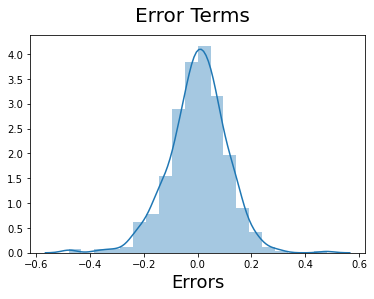

In [1720]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Error terms are normally distributed with the mean zero

## To check if the error terms are independent of each other

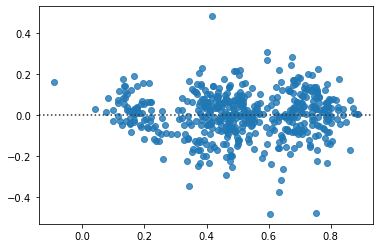

In [1722]:
# Residual analysis for independence 
sns.residplot(x=y_train_cnt, y=y_train - y_train_cnt )
plt.show()

#### Above indicates that the residual points are scattered equally above and below the line y=0
#### Hence this is normally distributed along the center
#### this implies that our model is fit for linear regression
### Above scatter plot shows that the assumption is true

# Making Predictions

Applying the scaling on the test sets


In [1723]:
day

,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,10.420847,65.2917,23.458911,2114,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
726,0,1,10.386653,59.0000,10.416557,3095,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
727,0,0,10.386653,75.2917,8.333661,1341,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
728,0,0,10.489153,48.3333,23.500518,1796,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [1724]:
# Same pre-processing (Scaling) for test set as we did for training set

num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

### Dividing into X_test and y_test

In [1725]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1726]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1727]:
# Making predictions on the test set
y_pred = lm.predict(X_test_new)

In [1728]:
y_pred.describe()

count    220.000000
mean       0.508454
std        0.188890
min       -0.103383
25%        0.411748
50%        0.491037
75%        0.682179
max        0.880304
dtype: float64

## Model Evaluation


Text(0, 0.5, 'y_pred')

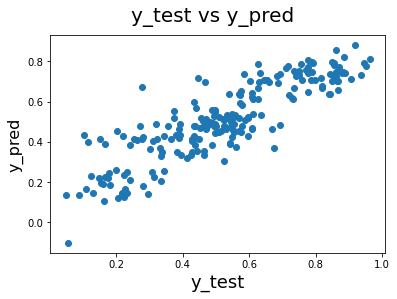

In [1729]:
# Plotting y_test and y_pred to visualise the spread
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)

In [1730]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_pred)

0.7489866044319642

## We have seen that the R2 score on training set was 0.763 and on the test set it is 0.748
## Looking at the r2_score we can say that, what the model has learnt in the training set; it is also able to generalise on the test set.

In [1731]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     178.9
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          3.77e-150
Time:                        20:16:16   Log-Likelihood:                 406.12
No. Observations:                 510   AIC:                            -792.2
Df Residuals:                     500   BIC:                            -749.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5850      0.015     39.507

# Final Equation is: 
    
 ## cnt =  - 0.1723 X windspeed - 0.2988 X spring - 0.0405 X summer - 0.0766 X winter 
 ## + 0.2476 X 2019  +  0.0705 X sep - 0.0455 X Monday - 0.2964 X Light Snow - 0.0892 X Mist & Cloudy + 0.585

    
    